In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [2]:
path = r'C:\Users\lecce\OneDrive\CitiBike'

In [3]:
citi42 = pd.read_csv("C:\\Users\\lecce\\OneDrive\\CitiBike\citibike\\citibike - Copy.csv") 

In [4]:
print(citi42.columns.tolist())

['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time', 'start_time.1', 'Start Date', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_time', 'end_time.1', 'End Date', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'trip_duration_mins', 'subscriber', 'birth_year']


**Hypothesis: Trip duration are ridres that are using citibikes to commute to work earlier in the day and return home will have the longest trip duration compare to people using city bikes during midday and evening hours.**

**To test this hypothesis we will use the the start hour as the independent variable whilte trip duartion will act as the depedent variable in this test**

In [6]:
X = citi42[['start_hour']].values  # Independent variable
y = citi42['trip_duration_mins'].values  # Dependent variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

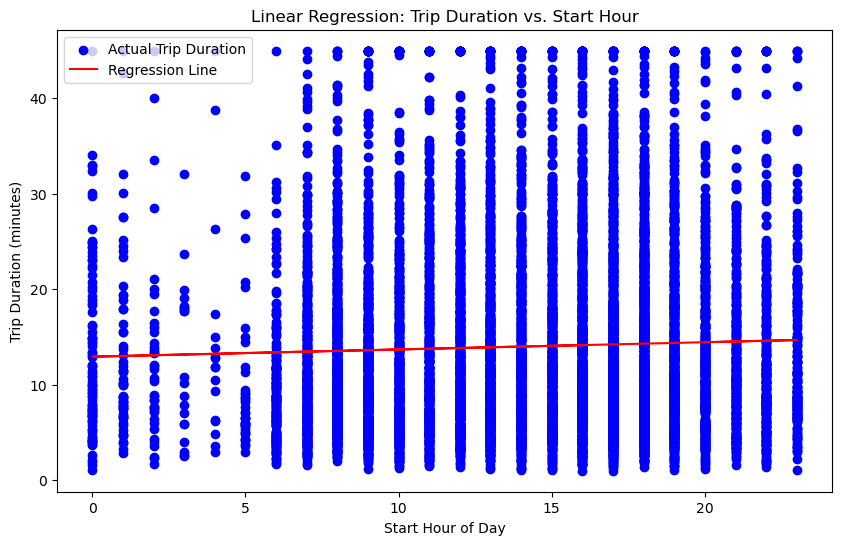

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Trip Duration')  # Actual data points
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Regression line
plt.xlabel('Start Hour of Day')
plt.ylabel('Trip Duration (minutes)')
plt.title('Linear Regression: Trip Duration vs. Start Hour')
plt.legend()
plt.show()
plot_file_path = r'C:\Users\lecce\OneDrive\CitiBike\citibike\6.4\Linear-Regression.png'
plt.savefig(plot_file_path)  # Save the figure as a PNG file

**The regression line, which appears to be flat without a clear incline or decline, suggests that there isn't a strong relationship between trip duration and start hour. This indicates that the time of day when a rider starts their trip doesn't significantly affect how long the trip lasts. The actual trip durations show a steady increase at the start of the day, followed by a dip, and then a general trend toward consistency as the day progresses. However, this observed pattern does not appear to be captured effectively by the regression model, which is reflected in the flatness of the regression line. The red line likely indicates that there is little to no correlation between the two variables (trip duration and start hour), suggesting that the start hour is not a strong predictor of trip duration.**

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
mse = mean_squared_error(y_test, y_pred)

In [14]:
r2 = r2_score(y_test, y_pred)

In [15]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [16]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(comparison_df.head())

Mean Squared Error (MSE): 88.58830265122833
R² Score: 0.0023028125673028033
      Actual  Predicted
0   5.700000  14.145103
1  15.100000  13.538997
2  10.433333  14.296630
3   7.500000  14.069340
4   9.333333  14.145103


**The model’s Mean Squared Error (MSE) of 88.59 suggests a substantial difference between the predicted and actual trip durations, indicating that the model unaccurately predicts trip duration based on start hour.**
**The R² score of 0.0023, nearly zero, implies that start hour has a negligible influence on trip duration. If a close relationship existed between these variables, the R² would be closer to 1, showing a stronger fit.**
**The Original hypothesis suggesting that trip duration might increase with certain start hours, the model’s predictions deviate significantly from actual values (e.g., predicting 14.15 minutes instead of an actual 5.7 minutes in one case). This result suggests that start hour alone is not enough to understanding trip duration, and further testing is needed with additional variables to improve model accuracy.**

**Subscribers vs. Non Subscribers** - CitiBike Usage

In [19]:
from scipy.stats import chi2_contingency

In [20]:
print(citi42.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_time.1', 'Start Date', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_time.1', 'End Date', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'trip_duration_mins', 'subscriber', 'birth_year'],
      dtype='object')


In [21]:
contingency_table = pd.crosstab(citi42['weekday'], citi42['subscriber'])

In [22]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [23]:
print(f"Chi-Square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-Square statistic: 1714.3232996533682
p-value: 0.0
Degrees of Freedom: 6


HeatMap: Frequency of Subscriber Status by Weekday

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
contingency_table = pd.crosstab(citi42['weekday'], citi42['subscriber'])

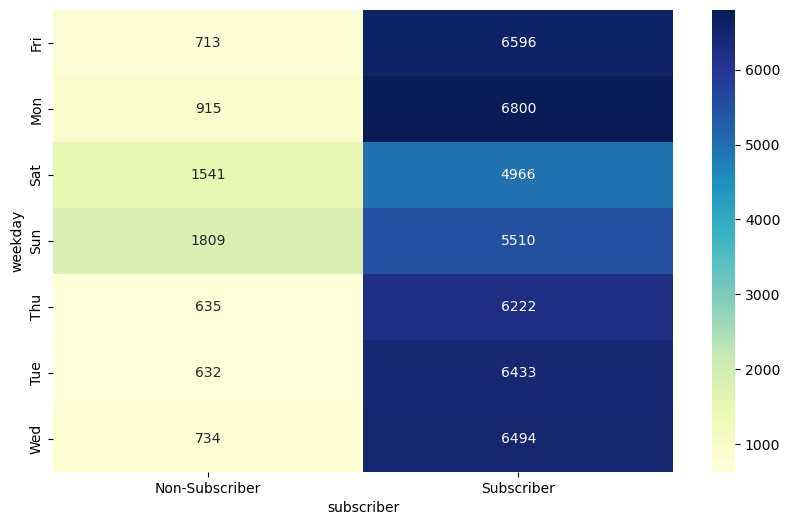

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plot_file_path = r'C:\Users\lecce\OneDrive\CitiBike\citibike\6.4\Chi-Square.png'
plt.savefig(plot_file_path)  # Save the figure as a PNG file

I used the Chi-Square test to test the relationship between weekday and subscriber status, as the two variables are likely to be closely linked. The Chi-Square statistic of 1714.32  that indicate a strong relationship between these two variables. A larger value for the statistic suggests a greater deviation from the null hypothesis, meaning that weekday and subscriber status are not independent.

The p-value of 0 further confirms this, suggesting that the relationship between the two variables is statistically significant. A p-value of 0 means the probability of observing this relationship by chance is virtually nonexistent, reinforcing the strong association between weekday and whether a user is a subscriber or non-subscriber.

To visually see this relationship, I created a heatmap to show the distribution of subscribers vs non-subscribers across different days of the week. From the heatmap, it's clear that Mondays and Fridays have much higher usage compared to other days, likely due to weekday commuters. Meanwhile, non-subscribers primarily use CitiBikes on weekends, suggesting they are using bikes for recreational purposes rather than commuting.